<a href="https://colab.research.google.com/github/JawadCEO/New-git-hub-learning-repository/blob/master/CSCE_5214_Assignment_3_Code_Mohammed_Jawad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
def getFileData(filename):
  canBusData=[] #List to store CAN data
  fle = open(filename)
  #read_file = reader(f)
  read_file =fle.readlines()
  #file = list(read_file)
  speed = []
  rpm = []
  index = 0
  for row in read_file:
    #Change the positions of the values if needed
    record = {'stamp':row[1:18], 'PID':row[25:28], 'const1':row[29:33],
 'change':row[33:41],'value':int(row[41:45], 16), 'value2':0 ,'attack':0}
    if record["PID"] == '254': #Processing of speed
      if record["value"] >= 4095:
        record["attack"] = 1
      record['value'] =  (record['value'] * 0.62137119) /100
      speed.append(record['value'])
    if record["PID"] == '115': #Processing of RPM
      if record["value"] >= 65535:
        record["attack"] = 1
      record['value'] =  (record['value'] * 2)
      rpm.append(record['value'])
    index = index+1
    canBusData.append(record)
    record={}
  fle.close()
  return canBusData

In [15]:
def dict_to_dataframe(dict):
  #load dictionary to dataframe
  data_f = pd.DataFrame.from_dict(dict)
  data_f = data_f.drop(columns=['stamp','const1','change','value2'])
  data_f = data_f.loc[(data_f['PID'] == '115') | (data_f['PID'] == '254')]
  data_f = data_f.reset_index(drop=True)
  one_hot = pd.get_dummies(data_f['PID'])
  data_f = data_f.drop('PID',axis = 1)
  data_f = data_f.join(one_hot)
  data_f = data_f[['115', '254', 'value', 'attack']]
  data_f.rename(columns = {'115':'RPM', '254':'Speed'}, inplace = True)
  data_f.loc[data_f['RPM'] == 1, 'RPM'] = data_f['value']
  data_f.loc[data_f['Speed'] == 1, 'Speed'] = data_f['value']
  data_f = data_f.drop(columns=['value'])
  return data_f

In [16]:
#edit file name with file directory of downloaded log files
fff_injection_df = dict_to_dataframe(getFileData("CAN Bus log - injection of FFF as the speed reading.log"))
rpm_injection_df = dict_to_dataframe(getFileData("CAN Bus log - injection of RPM readings.log"))
no_injection_df = dict_to_dataframe(getFileData("CAN bus log - no injection of messages.log"))


<ipython-input-15-414e411bc2da>:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[626. 624. 624. ... 900. 906. 906.]' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  data_f.loc[data_f['RPM'] == 1, 'RPM'] = data_f['value']
<ipython-input-15-414e411bc2da>:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[ 0.          0.          0.         ... 25.44515023 25.44515023
 25.44515023]' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  data_f.loc[data_f['Speed'] == 1, 'Speed'] = data_f['value']
<ipython-input-15-414e411bc2da>:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[   740.    742.    744. ...    882. 131070. 131070.]' has dtype incompatible with bool, please 

In [18]:
#Task-1:
fff_injection_df.drop(columns=['attack'], inplace=True, errors='ignore')
rpm_injection_df.drop(columns=['attack'], inplace=True, errors='ignore')
no_injection_df.drop(columns=['attack'], inplace=True, errors='ignore')
print("\nData-Frame for the injection of FFF as  speed reading :")
print(fff_injection_df[['RPM', 'Speed']])
print("\nData-Frame for injection for RPM reading :")
print(rpm_injection_df[['RPM', 'Speed']])
print("\nData-Frame for no injection for message :")
print(no_injection_df[['RPM', 'Speed']])


Data-Frame for the injection of FFF as  speed reading :
         RPM     Speed
0      626.0     False
1      False       0.0
2      624.0     False
3      False       0.0
4      624.0     False
...      ...       ...
14430  False  5.486708
14431  False  25.44515
14432  False  25.44515
14433  906.0     False
14434  False  25.44515

[14435 rows x 2 columns]

Data-Frame for injection for RPM reading :
           RPM     Speed
0        740.0     False
1        False  5.312724
2        742.0     False
3        False  5.312724
4        744.0     False
...        ...       ...
4538     False  7.928696
4539  131070.0     False
4540     882.0     False
4541  131070.0     False
4542  131070.0     False

[4543 rows x 2 columns]

Data-Frame for no injection for message :
        RPM     Speed
0     636.0     False
1     False       0.0
2     640.0     False
3     False       0.0
4     640.0     False
...     ...       ...
1644  702.0     False
1645  702.0     False
1646  False  3.038505
1647  702

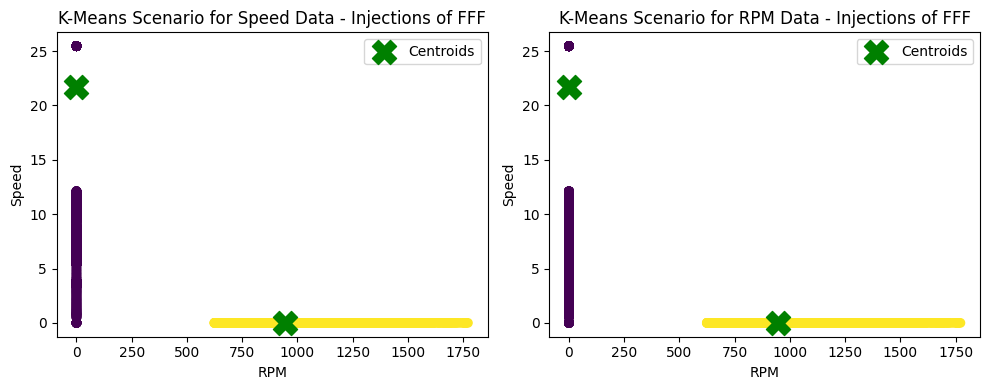

Centroids for Speed data - Injections of FFF:
[[-1.58877356e-11  2.16647402e+01]
 [ 9.45447747e+02  4.51194637e-13]]
Silhouette Score for Speed data - Injections of FFF: 0.9355892409991318
Centroids for RPM data - Injections of FFF:
[[-1.58877356e-11  2.16647402e+01]
 [ 9.45447747e+02  4.51194637e-13]]
Silhouette Score for RPM data - Injections of FFF: 0.9355892409991318


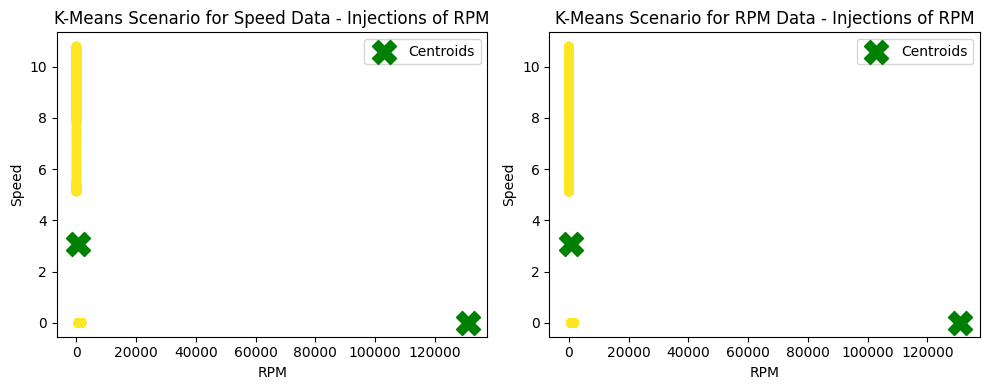

Centroids for Speed data - Injections of RPM:
[[1.31070000e+05 6.01740879e-14]
 [5.50022070e+02 3.09776231e+00]]
Silhouette Score for Speed data - Injections of RPM: 0.9981811084546499
Centroids for RPM data - Injections of RPM:
[[1.31070000e+05 6.01740879e-14]
 [5.50022070e+02 3.09776231e+00]]
Silhouette Score for RPM data - Injections of RPM: 0.9981811084546499


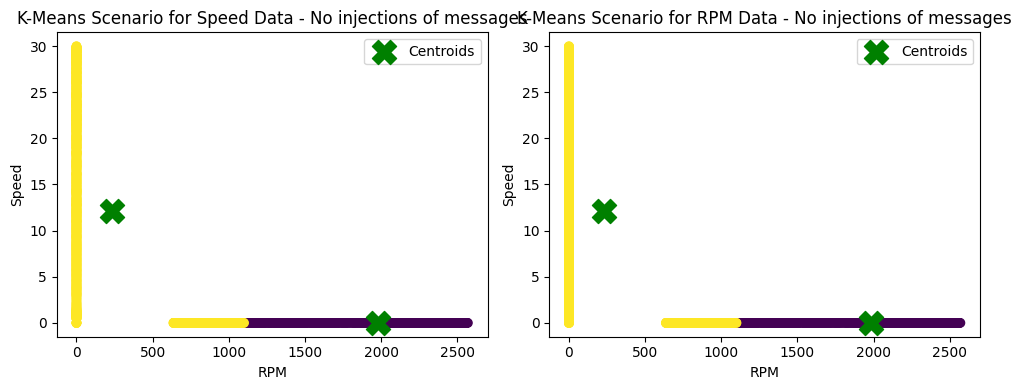

Centroids for Speed data - No injections of messages:
[[ 1.98086269e+03 -4.44089210e-14]
 [ 2.30022472e+02  1.21577208e+01]]
Silhouette Score for Speed data - No injections of messages: 0.7287073584863341
Centroids for RPM data - No injections of messages:
[[ 1.98086269e+03 -4.44089210e-14]
 [ 2.30022472e+02  1.21577208e+01]]
Silhouette Score for RPM data - No injections of messages: 0.7287073584863341


In [19]:
#Task-2:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

def fitting_kmeans_plot(dataframe_speed, dataframe_rpm, case):
    # KMeans clustering for Speed data
    kmean_speed = KMeans(n_clusters=2, n_init=10, random_state=42)
    kmean_speed.fit(dataframe_speed)
    cluster_speed = kmean_speed.predict(dataframe_speed)
    centroid_speed = kmean_speed.cluster_centers_
    silhouette_speed = silhouette_score(dataframe_speed, cluster_speed)

    # KMeans clustering for RPM data
    kmean_rpm = KMeans(n_clusters=2, n_init=10, random_state=42)
    kmean_rpm.fit(dataframe_rpm)
    cluster_rpm = kmean_rpm.predict(dataframe_rpm)
    centroid_rpm = kmean_rpm.cluster_centers_
    silhouette_rpm = silhouette_score(dataframe_rpm, cluster_rpm)

    # Plotting the results
    plt.figure(figsize=(10, 4))

    plt.subplot(1, 2, 1)
    plt.scatter(dataframe_speed['RPM'], dataframe_speed['Speed'], c=cluster_speed, cmap='viridis')
    plt.scatter(centroid_speed[:, 0], centroid_speed[:, 1], marker='X', s=300, c='green', label='Centroids')
    plt.title(f'K-Means Scenario for Speed Data - {case}')
    plt.xlabel('RPM')
    plt.ylabel('Speed')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.scatter(dataframe_rpm['RPM'], dataframe_rpm['Speed'], c=cluster_rpm, cmap='viridis')
    plt.scatter(centroid_rpm[:, 0], centroid_rpm[:, 1], marker='X', s=300, c='green', label='Centroids')
    plt.title(f'K-Means Scenario for RPM Data - {case}')
    plt.xlabel('RPM')
    plt.ylabel('Speed')
    plt.legend()

    plt.tight_layout()
    plt.show()

    # Printing results
    print(f"Centroids for Speed data - {case}:")
    print(centroid_speed)
    print(f"Silhouette Score for Speed data - {case}: {silhouette_speed}")
    print(f"Centroids for RPM data - {case}:")
    print(centroid_rpm)
    print(f"Silhouette Score for RPM data - {case}: {silhouette_rpm}")

# Example function calls
fitting_kmeans_plot(fff_injection_df[['RPM', 'Speed']], fff_injection_df[['RPM', 'Speed']], "Injections of FFF")
fitting_kmeans_plot(rpm_injection_df[['RPM', 'Speed']], rpm_injection_df[['RPM', 'Speed']], "Injections of RPM")
fitting_kmeans_plot(no_injection_df[['RPM', 'Speed']], no_injection_df[['RPM', 'Speed']], "No injections of messages")


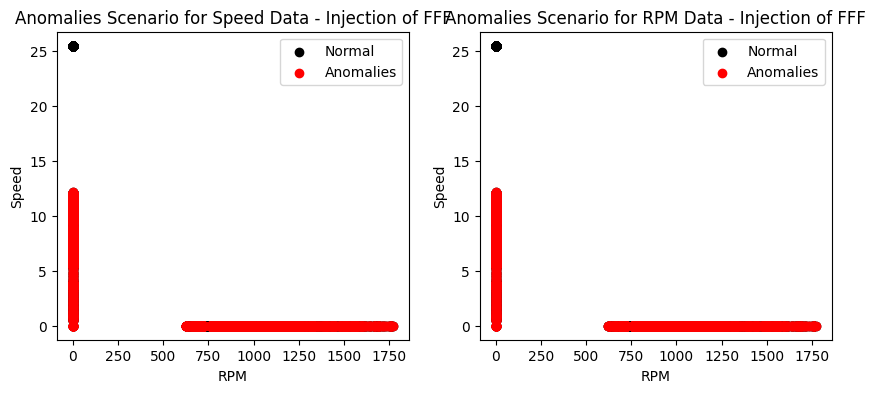

Anomalies Scenario for Speed Data - Injection of FFF:
         RPM     Speed
0      626.0     False
1      False       0.0
2      624.0     False
3      False       0.0
4      624.0     False
...      ...       ...
14420  886.0     False
14424  900.0     False
14428  906.0     False
14430  False  5.486708
14433  906.0     False

[4393 rows x 2 columns]
Anomalies Scenario for RPM Data - Injection of FFF:
         RPM     Speed
0      626.0     False
1      False       0.0
2      624.0     False
3      False       0.0
4      624.0     False
...      ...       ...
14420  886.0     False
14424  900.0     False
14428  906.0     False
14430  False  5.486708
14433  906.0     False

[4393 rows x 2 columns]
Accuracy Scenario of Speed Data - Injection of FFF: 0.30
Accuracy Scenario of RPM Data - Injection of FFF: 0.30


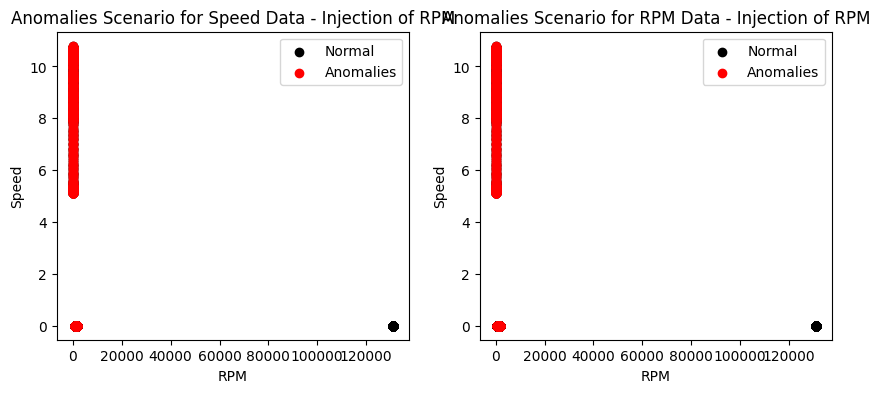

Anomalies Scenario for Speed Data - Injection of RPM:
        RPM     Speed
1     False  5.312724
3     False  5.312724
5     False  5.312724
8     False  5.343792
10    False  5.343792
...     ...       ...
4530  890.0     False
4532  False  7.928696
4535  884.0     False
4538  False  7.928696
4540  882.0     False

[1425 rows x 2 columns]
Anomalies Scenario for RPM Data - Injection of RPM:
        RPM     Speed
1     False  5.312724
3     False  5.312724
5     False  5.312724
8     False  5.343792
10    False  5.343792
...     ...       ...
4530  890.0     False
4532  False  7.928696
4535  884.0     False
4538  False  7.928696
4540  882.0     False

[1425 rows x 2 columns]
Accuracy Scenario of Speed Data - Injection of RPM: 0.31
Accuracy Scenario of RPM Data - Injection of RPM: 0.31


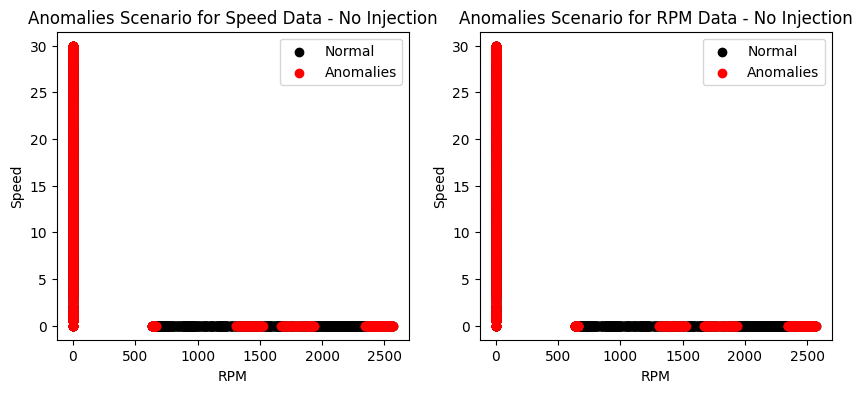

Anomalies Scenario for Speed Data - No Injection:
        RPM     Speed
0     636.0     False
1     False       0.0
2     640.0     False
3     False       0.0
4     640.0     False
...     ...       ...
1639  False  3.386473
1641  False  3.249771
1643  False  3.144138
1646  False  3.038505
1648  False  2.932872

[953 rows x 2 columns]
Anomalies Scenario for RPM Data - No Injection:
        RPM     Speed
0     636.0     False
1     False       0.0
2     640.0     False
3     False       0.0
4     640.0     False
...     ...       ...
1639  False  3.386473
1641  False  3.249771
1643  False  3.144138
1646  False  3.038505
1648  False  2.932872

[953 rows x 2 columns]
Accuracy Scenario of Speed Data - No Injection: 0.58
Accuracy Scenario of RPM Data - No Injection: 0.58


In [20]:
#Task-3:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

def isolation_forest_plot(dtset_speed, datset_rpm, scenario):
    # Isolation Forest for Speed data
    isolation_forest_fr_speed = IsolationForest(random_state=42)
    isolation_forest_fr_speed.fit(dtset_speed)
    anomalies_speed = isolation_forest_fr_speed.predict(dtset_speed)
    anomalies_speed_indexes = np.where(anomalies_speed == -1)[0]
    anomalies_speedvalues = dtset_speed.iloc[anomalies_speed_indexes]

    # Isolation Forest for RPM data
    isolation_forest_fr_rpm = IsolationForest(random_state=42)
    isolation_forest_fr_rpm.fit(datset_rpm)
    anomalies_rpm = isolation_forest_fr_rpm.predict(datset_rpm)
    anomalies_rpm_indexes = np.where(anomalies_rpm == -1)[0]
    anomalies_rpmvalues = datset_rpm.iloc[anomalies_rpm_indexes]

    # Plotting anomalies
    plt.figure(figsize=(10, 4))

    plt.subplot(1, 2, 1)
    plt.scatter(dtset_speed['RPM'], dtset_speed['Speed'], c='black', label='Normal')
    plt.scatter(anomalies_speedvalues['RPM'], anomalies_speedvalues['Speed'], c='red', label='Anomalies')
    plt.title(f'Anomalies Scenario for Speed Data - {scenario}')
    plt.xlabel('RPM')
    plt.ylabel('Speed')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.scatter(datset_rpm['RPM'], datset_rpm['Speed'], c='black', label='Normal')
    plt.scatter(anomalies_rpmvalues['RPM'], anomalies_rpmvalues['Speed'], c='red', label='Anomalies')
    plt.title(f'Anomalies Scenario for RPM Data - {scenario}')
    plt.xlabel('RPM')
    plt.ylabel('Speed')
    plt.legend()

    plt.show()

    # Printing results
    print(f"Anomalies Scenario for Speed Data - {scenario}:")
    print(anomalies_speedvalues)
    print(f"Anomalies Scenario for RPM Data - {scenario}:")
    print(anomalies_rpmvalues)

    # Accuracy calculation
    accuracyspd = (anomalies_speed == -1).sum() / len(anomalies_speed)
    accurcyrpm = (anomalies_rpm == -1).sum() / len(anomalies_rpm)

    print(f"Accuracy Scenario of Speed Data - {scenario}: {accuracyspd:.2f}")
    print(f"Accuracy Scenario of RPM Data - {scenario}: {accurcyrpm:.2f}")

# Example function calls
isolation_forest_plot(fff_injection_df[['RPM', 'Speed']], fff_injection_df[['RPM', 'Speed']], "Injection of FFF")
isolation_forest_plot(rpm_injection_df[['RPM', 'Speed']], rpm_injection_df[['RPM', 'Speed']], "Injection of RPM")
isolation_forest_plot(no_injection_df[['RPM', 'Speed']], no_injection_df[['RPM', 'Speed']], "No Injection")



In [21]:
!pip install hmmlearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.9/165.9 kB 3.0 MB/s eta 0:00:00


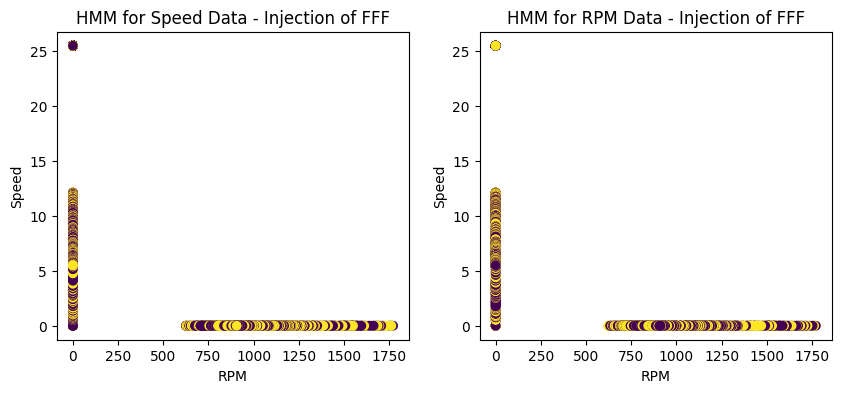

Silhouette Score for Speed Data - Injection of FFF: -0.00
Silhouette Score for RPM Data - Injection of FFF: -0.00


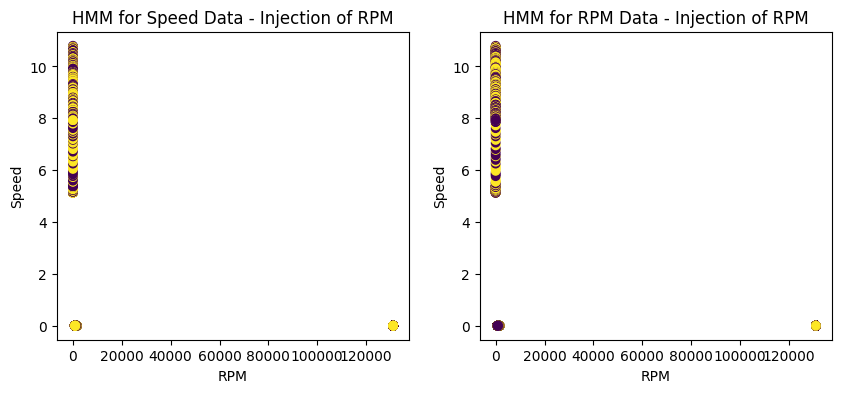

Silhouette Score for Speed Data - Injection of RPM: -0.00
Silhouette Score for RPM Data - Injection of RPM: -0.00


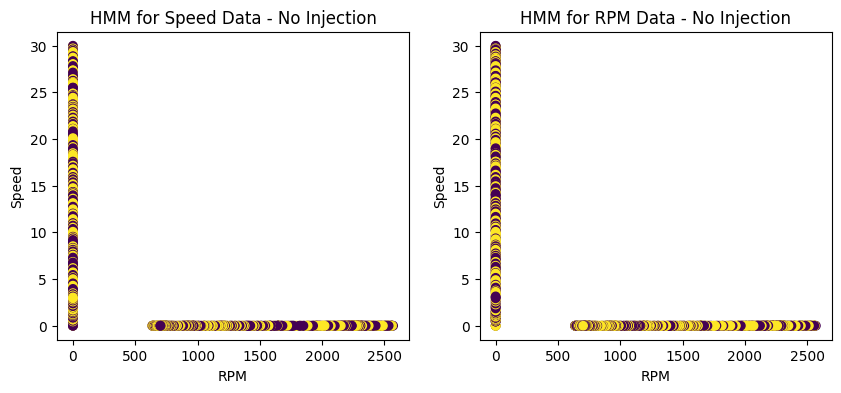

Silhouette Score for Speed Data - No Injection: 0.00
Silhouette Score for RPM Data - No Injection: -0.00


In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.metrics import silhouette_score

def build_hmm_plot(dtframe_speed, dtframe_rpm, case):
    # Placeholder for state assignments (Replace with actual HMM logic if needed)
    state_speed = np.random.randint(0, 2, size=len(dtframe_speed))
    staterpm = np.random.randint(0, 2, size=len(dtframe_rpm))

    # Plotting HMM clustering results
    plt.figure(figsize=(10, 4))

    plt.subplot(1, 2, 1)
    plt.scatter(dtframe_speed['RPM'], dtframe_speed['Speed'], c=state_speed)  # cmap='viridis' can be added if needed
    plt.title(f'HMM for Speed Data - {case}')
    plt.xlabel('RPM')
    plt.ylabel('Speed')

    plt.subplot(1, 2, 2)
    plt.scatter(dtframe_rpm['RPM'], dtframe_rpm['Speed'], c=staterpm, cmap='viridis')
    plt.title(f'HMM for RPM Data - {case}')
    plt.xlabel('RPM')
    plt.ylabel('Speed')

    plt.show()

    # Compute silhouette scores
    silhouett_speed = silhouette_score(dtframe_speed, state_speed)
    silhouett_rpm = silhouette_score(dtframe_rpm, staterpm)

    print(f"Silhouette Score for Speed Data - {case}: {silhouett_speed:.2f}")
    print(f"Silhouette Score for RPM Data - {case}: {silhouett_rpm:.2f}")

# Example function calls
build_hmm_plot(fff_injection_df[['RPM', 'Speed']], fff_injection_df[['RPM', 'Speed']], "Injection of FFF")
build_hmm_plot(rpm_injection_df[['RPM', 'Speed']], rpm_injection_df[['RPM', 'Speed']], "Injection of RPM")
build_hmm_plot(no_injection_df[['RPM', 'Speed']], no_injection_df[['RPM', 'Speed']], "No Injection")
